In [1]:
import xarray as xr
import rasterio as rio
import pandas as pd 
from rasterio.plot import show
import matplotlib.pyplot as plt
import rioxarray
import imageio
import glob

In [3]:
ds_ice = xr.open_dataset("Data/ice/MODEL.ICE.HAD187001-198110.OI198111-202109.nc")

In [4]:
ice = ds_ice.rio.write_crs(4326, inplace=True)

In [5]:
ice_time = pd.DataFrame(columns=['year', 'ice_conc'])

In [6]:
ice_year = []

ice_conc = []

In [7]:
for i in range(0, 40):
    
    ice_i = float(ice['SEAICE'][1341 + (12 * i)].mean())

    year_i = 1981 + i

    ice_year.append(year_i)

    ice_conc.append(ice_i)

In [8]:
ice_time['year'] = ice_year
ice_time['ice_conc'] = ice_conc

In [9]:
ice_time

,year,ice_conc
0,1981,24.723967
1,1982,24.581732
2,1983,24.599352
3,1984,23.901114
4,1985,23.986412
5,1986,24.489408
6,1987,24.082897
7,1988,24.113588
8,1989,23.921965
9,1990,23.706593


Text(0, 0.5, 'Ice concentration')

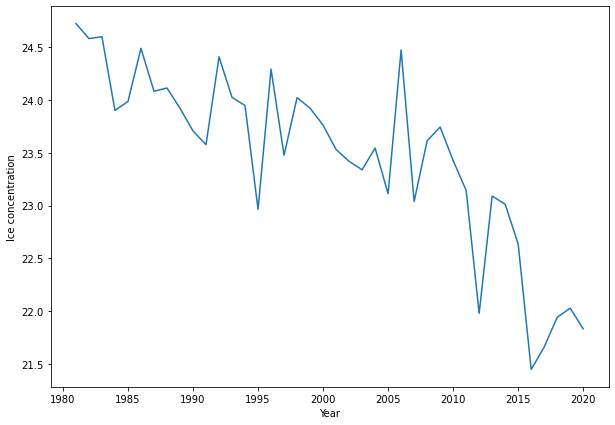

In [10]:
plt.figure(figsize=(10,7))
plt.plot(ice_time['year'], ice_time['ice_conc'])
plt.xlabel('Year')
plt.ylabel('Ice concentration')

In [12]:
filenames = sorted(glob.glob('Data/sst/NOAA_SST/oisst-avhrr-v02r01*'))

new = [xr.open_dataset(f).to_dataframe(dim_order=None) for f in filenames]

df = pd.concat(new)

df

anom  err   ice   sst
time                zlev lat     lon                           
1981-10-17 12:00:00 0.0  -89.875 0.125     NaN  NaN   NaN   NaN
                                 0.375     NaN  NaN   NaN   NaN
                                 0.625     NaN  NaN   NaN   NaN
                                 0.875     NaN  NaN   NaN   NaN
                                 1.125     NaN  NaN   NaN   NaN
...                                        ...  ...   ...   ...
2021-10-17 12:00:00 0.0   89.875 358.875  0.41  0.3  0.92 -1.39
                                 359.125  0.47  0.3  0.92 -1.33
                                 359.375  0.03  0.3  0.92 -1.77
                                 359.625  0.00  0.3  0.92 -1.80
                                 359.875  0.00  0.3  0.92 -1.80

[42508800 rows x 4 columns]

In [13]:
# subset the columns
df_subset = df['sst']
# drop NA's
df_subset_no_na = df_subset.dropna()
# group by time and take the annual means
sst_means = df_subset_no_na.groupby('time').mean('sst')
# convert to a df
sst_means_df = sst_means.to_frame()
# reset the 'time' from an index to a column
sst_means_df = sst_means_df.reset_index()
sst_means_df

,time,sst
0,1981-10-17 12:00:00,13.386664
1,1982-10-17 12:00:00,13.396963
2,1983-10-17 12:00:00,13.377075
3,1984-10-17 12:00:00,13.326571
4,1985-10-17 12:00:00,13.269166
5,1986-10-17 12:00:00,13.338634
6,1987-10-17 12:00:00,13.368731
7,1988-10-17 12:00:00,13.340157
8,1989-10-17 12:00:00,13.335047
9,1990-10-17 12:00:00,13.426472


In [17]:
sst_means_df['time'] = pd.to_datetime(sst_means_df['time'])

In [18]:
print(sst_means_df['time'].dtype)

datetime64[ns]


In [19]:
sst_means_df['year'] = pd.DatetimeIndex(sst_means_df['time']).year
sst_means_df

,time,sst,year
0,1981-10-17 12:00:00,13.386664,1981
1,1982-10-17 12:00:00,13.396963,1982
2,1983-10-17 12:00:00,13.377075,1983
3,1984-10-17 12:00:00,13.326571,1984
4,1985-10-17 12:00:00,13.269166,1985
5,1986-10-17 12:00:00,13.338634,1986
6,1987-10-17 12:00:00,13.368731,1987
7,1988-10-17 12:00:00,13.340157,1988
8,1989-10-17 12:00:00,13.335047,1989
9,1990-10-17 12:00:00,13.426472,1990


No handles with labels found to put in legend.


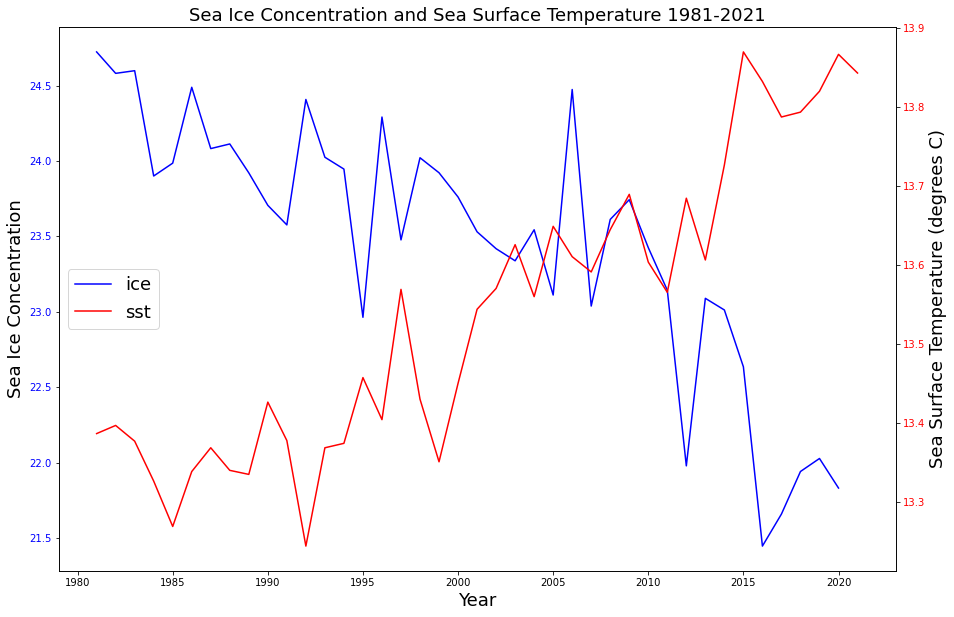

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
ice, = ax.plot(ice_time['year'], ice_time['ice_conc'], color='blue')
ax.tick_params(axis='y', labelcolor='blue')
plt.xlabel('Year', fontsize = 18)
ax.set_ylabel('Sea Ice Concentration', fontsize = 18)
ax2 = ax.twinx()
sst, = ax2.plot(sst_means_df['year'], sst_means_df['sst'], color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Sea Surface Temperature (degrees C)', fontsize = 18)
leg1 = ax.legend(loc='center left')
leg2 = ax.legend([ice, sst],['ice','sst'], loc='center left', fontsize = 18)
ax.set_title('Sea Ice Concentration and Sea Surface Temperature 1981-2021', fontsize = 18)
plt.show()